# PCA with "Supervised" Algorithms

## Imports

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.pyplot import matplotlib
plt.rcParams["figure.figsize"] = (10,6)

In [51]:
df = pd.read_csv("Wine.csv")

In [52]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [53]:
df.shape

(178, 14)

In [54]:
df.Customer_Segment.unique()
# 1 kötü  2 orta 3 iyi şarap

array([1, 2, 3], dtype=int64)

In [55]:
df.Customer_Segment.value_counts()
# dengeli bir dağılım

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

<AxesSubplot:>

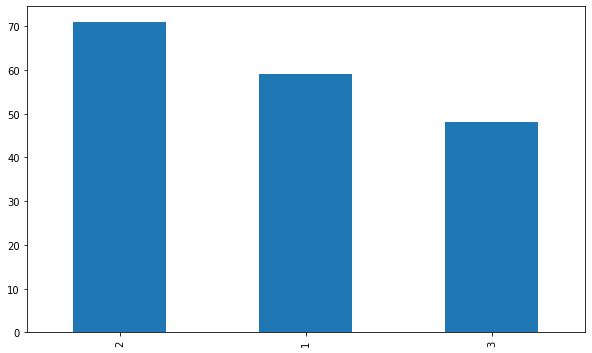

In [56]:
df.Customer_Segment.value_counts().plot.bar()

In [8]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<AxesSubplot:>

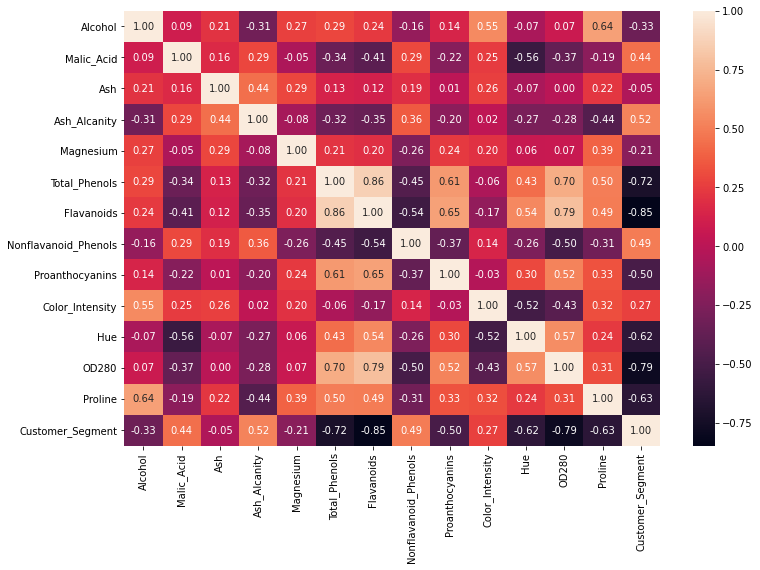

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f")

<AxesSubplot:>

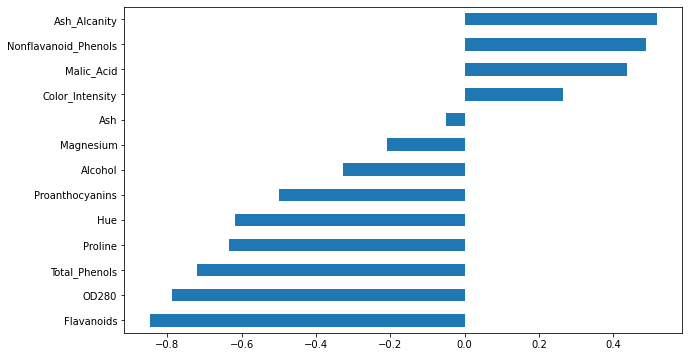

In [10]:
df.corr()["Customer_Segment"][:-1].sort_values().plot(kind="barh")

In [11]:
df.isnull().sum().any()

False

## Split the Data              supervised diye

In [57]:
X = df.drop("Customer_Segment", axis = 1)

In [58]:
y = df["Customer_Segment"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

## Scaling Data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling with Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)

In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))  # full çekmiş.

[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [22]:
classifier.feature_importances_

array([0.12930939, 0.02858818, 0.01005337, 0.02107876, 0.02670528,
       0.04826478, 0.17041694, 0.01237242, 0.01801449, 0.17606478,
       0.06869346, 0.09987653, 0.19056163])

In [23]:
feats = pd.DataFrame(index=df.iloc[:,:-1].columns, data= classifier.feature_importances_, 
                     columns=['Importance'])
feats

,Importance
Alcohol,0.129309
Malic_Acid,0.028588
Ash,0.010053
Ash_Alcanity,0.021079
Magnesium,0.026705
Total_Phenols,0.048265
Flavanoids,0.170417
Nonflavanoid_Phenols,0.012372
Proanthocyanins,0.018014
Color_Intensity,0.176065


In [24]:
imp_feats = feats.sort_values("Importance")
imp_feats

,Importance
Ash,0.010053
Nonflavanoid_Phenols,0.012372
Proanthocyanins,0.018014
Ash_Alcanity,0.021079
Magnesium,0.026705
Malic_Acid,0.028588
Total_Phenols,0.048265
Hue,0.068693
OD280,0.099877
Alcohol,0.129309


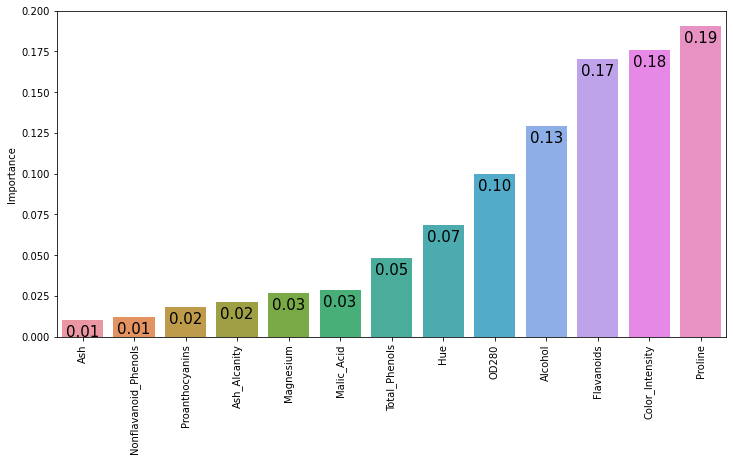

In [25]:
plt.figure(figsize=(12,6))
splot = sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

## Remodelling by feature importance

In [26]:
X2 = df[["Proline", "Color_Intensity", "Flavanoids"]] # 3 feature a göre  önemli olanlar göre yani.

In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2, stratify=y, random_state = 0)

In [28]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [29]:
classifier2 = RandomForestClassifier(random_state = 0)
classifier2.fit(X_train2, y_train2)

RandomForestClassifier(random_state=0)

In [30]:
y_pred2 = classifier2.predict(X_test2)

In [31]:
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))  # sade 1 hata aldık 3 columns a göre.

[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## PCA

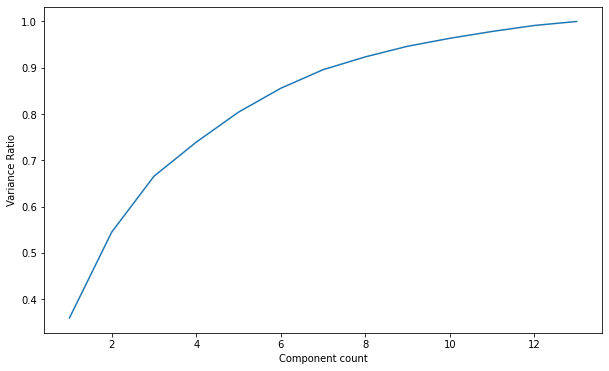

In [32]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
x = range(1,14)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [33]:
pca = PCA(n_components=13).fit(X_train)

In [34]:
my_dict = {"explained_variance":pca.explained_variance_, 
           "explained_variance_ratio":pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

In [35]:
df_ev = pd.DataFrame(my_dict, index = range(1,14))
df_ev  # 4 ve üzeri seçilmeli.75 üsütü için

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,4.706713,0.359505,0.359505
2,2.428244,0.185473,0.544978
3,1.580507,0.120721,0.665699
4,0.964060,0.073636,0.739335
5,0.848632,0.064820,0.804155
6,0.675462,0.051593,0.855748
7,0.524426,0.040056,0.895804
8,0.363173,0.027740,0.923544
9,0.300204,0.022930,0.946474
10,0.224731,0.017165,0.963639


In [36]:
pca = PCA(n_components = 2)

In [37]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)  # sızıntı olmasın diye fit işlemi böle olmalı.

In [38]:
df_pca_train = pd.DataFrame(X_train_pca)
df_pca_train = df_pca_train.rename(columns={0:"first_component", 1:"second_component"})
df_pca_train.head()

,first_component,second_component
0,-0.783937,-1.590432
1,-1.792083,0.583400
2,2.101051,2.109598
3,3.107242,0.448619
4,0.725718,-2.107998


In [39]:
df_pca_test=pd.DataFrame(X_test_pca)
df_pca_test = df_pca_test.rename(columns={0:"first_component", 1:"second_component"})
df_pca_test.head()

,first_component,second_component
0,0.510682,-1.703429
1,-1.431099,0.675556
2,1.517576,-1.098461
3,-2.504356,1.651059
4,-0.335949,-2.097911


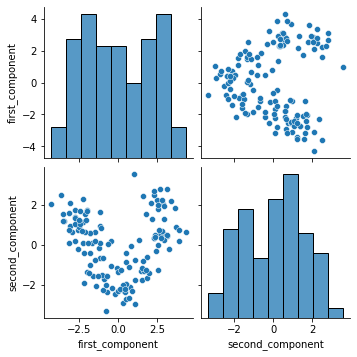

In [40]:
sns.pairplot(df_pca_train)

In [41]:
df_pca_train.corr().round()  # corr. yok zaten

,first_component,second_component
first_component,1.0,0.0
second_component,0.0,1.0


## Modelling after PCA

In [42]:
classifier3 = RandomForestClassifier(random_state = 0)
classifier3.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=0)

In [43]:
y_pred = classifier3.predict(X_test_pca)
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 1, 13,  0],
       [ 0,  0, 10]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



## Interpreting PCA results

In [45]:
scaled_df = pd.DataFrame(X_train, columns = df.columns[:-1])

In [46]:
combined_df = pd.concat([df_pca_train, scaled_df], axis=1)
correlation = combined_df.corr()
correlation.head()

,first_component,second_component,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
first_component,1.000000e+00,3.773124e-17,-0.315917,0.522374,-0.041560,0.457484,-0.297626,-0.858881,-0.910155,0.647516,-0.661573,0.157077,-0.703526,-0.796406,-0.651453
second_component,3.773124e-17,1.000000e+00,0.759174,0.314529,0.481679,-0.033691,0.471424,0.089916,-0.016412,0.122430,0.060781,0.847400,-0.340077,-0.332120,0.556237
Alcohol,-3.159174e-01,7.591742e-01,1.000000,0.086124,0.201450,-0.315958,0.249971,0.287509,0.224431,-0.089860,0.123973,0.541419,0.040125,0.023660,0.652054
Malic_Acid,5.223736e-01,3.145289e-01,0.086124,1.000000,0.123963,0.272138,-0.071824,-0.313270,-0.384919,0.328954,-0.201117,0.203619,-0.534350,-0.365818,-0.216060
Ash,-4.156029e-02,4.816793e-01,0.201450,0.123963,1.000000,0.499520,0.295116,0.162924,0.149936,0.158610,0.049224,0.251937,-0.036072,0.025333,0.204146


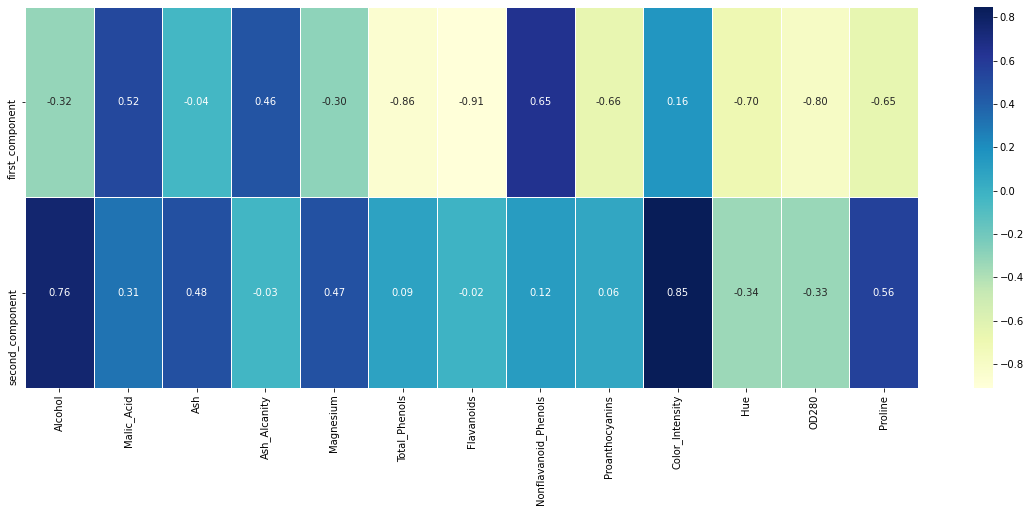

In [47]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:2,2:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

<AxesSubplot:>

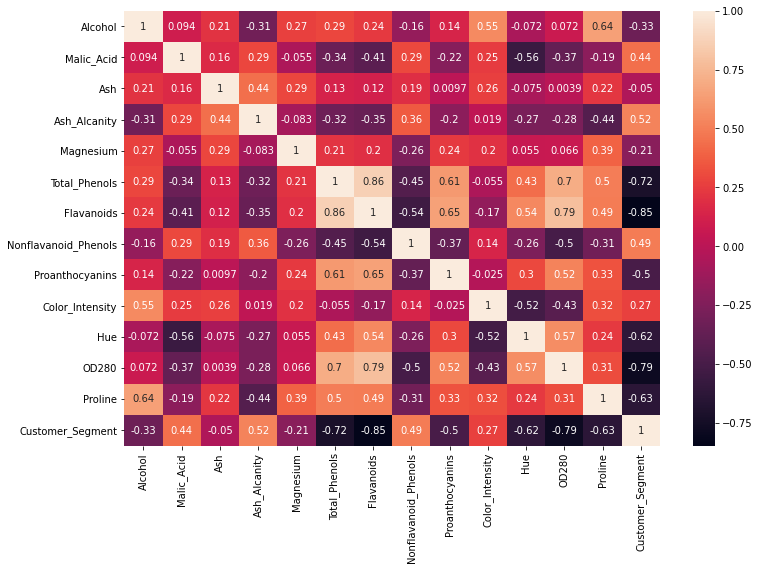

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='first_component', ylabel='second_component'>

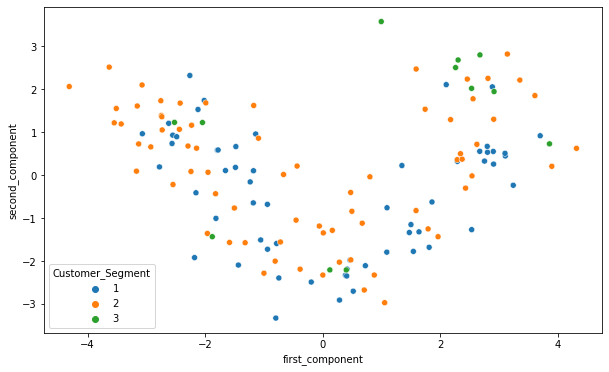

In [49]:
sns.scatterplot(x = df_pca_train["first_component"], y= df_pca_train["second_component"], hue=df.Customer_Segment, 
                palette="tab10")